<a href="https://colab.research.google.com/github/AminTurmudiYusup/machine_learning_task/blob/master/task3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from google.colab import files

%precision %.4f

import warnings
warnings.filterwarnings('ignore')

uploaded = files.upload()

Saving heart.csv to heart.csv


**1. Прочитать данные из файла**

In [ ]:
df=pd.read_csv('heart.csv')

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


**2. Основная информация о данных**

In [ ]:
# Data overview
print("Dataset Shape:", df.shape) #Дайте нам информацию о количестве строк и столбцов DataFrame
print("\nData Types:\n", df.dtypes) #Дайте нам информацию о типе данных

Dataset Shape: (1025, 14)

Data Types:
 age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


**3. Очистка данных**

In [ ]:
# 1. Check for missing values
print("Missing values per column:\n", df.isnull().sum())

def fill_missing_with_median_or_mean(df):
    for column in df.columns:
        if df[column].isnull().any():
            if abs(df[column].skew()) > 0.5:
                df[column].fillna(df[column].median(), inplace=True)
                print(f"Filled missing values in '{column}' with median")
            else:
                df[column].fillna(df[column].mean(), inplace=True)
                print(f"Filled missing values in '{column}' with mean")

fill_missing_with_median_or_mean(df)
print("\nData after filling missing values:\n", df)

Missing values per column:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Data after filling missing values:
       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   27

**4. Исследовательский анализ данных (EDA)**
**:** Если DataFrame содержит числовые данные, описание содержит следующую информацию для каждого столбца: среднее значение, стандартное отклонение, минимум, 25%, 50%, ,75%, макс.

In [ ]:
print("Calculate between have disease or not : ", df.target.value_counts())
print("\nSummary Statistics:\n", df.describe())

Calculate between have disease or not :  target
1    526
0    499
Name: count, dtype: int64

Summary Statistics:
                age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std   

**5. Визуализация**

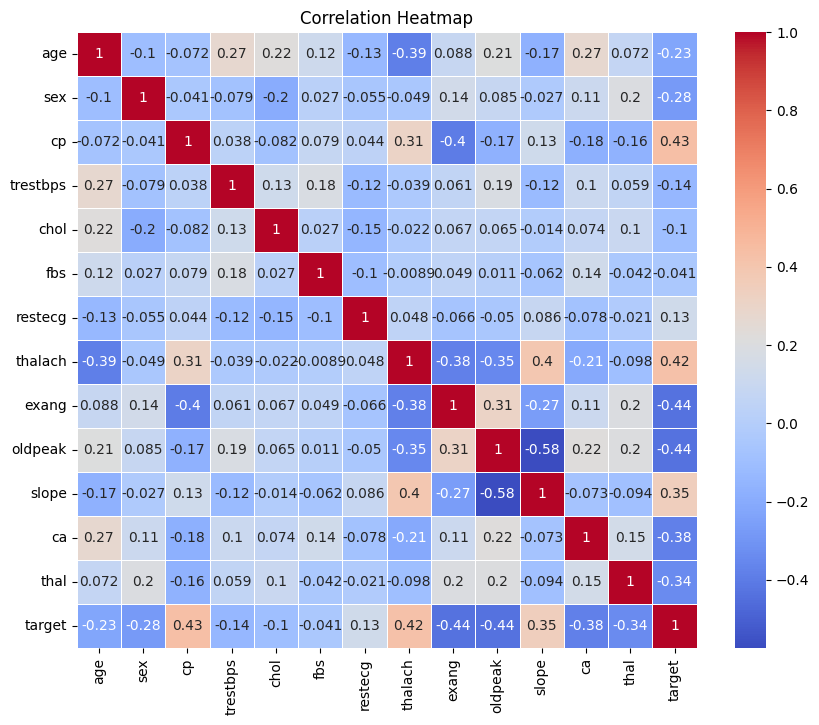

In [ ]:
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

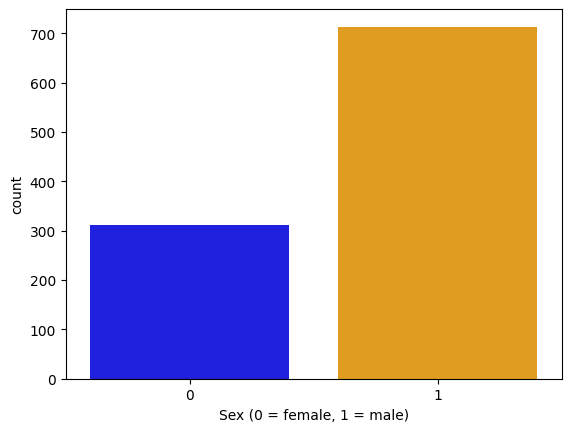

In [ ]:
sns.countplot(x='sex', data=df, palette=["blue", "orange"])
plt.xlabel("Sex (0 = female, 1 = male)")
plt.show()

Text(0, 0.5, 'Cholesterol')

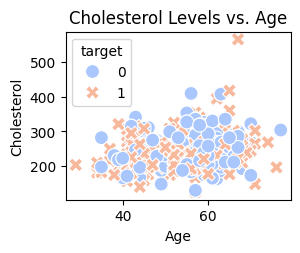

In [ ]:
# 3. Cholesterol Levels vs. Age
plt.subplot(2, 2, 3)
sns.scatterplot(x='age', y='chol', hue='target', style='target', s=100, palette='coolwarm', data=df)
plt.title('Cholesterol Levels vs. Age')
plt.xlabel('Age')
plt.ylabel('Cholesterol')

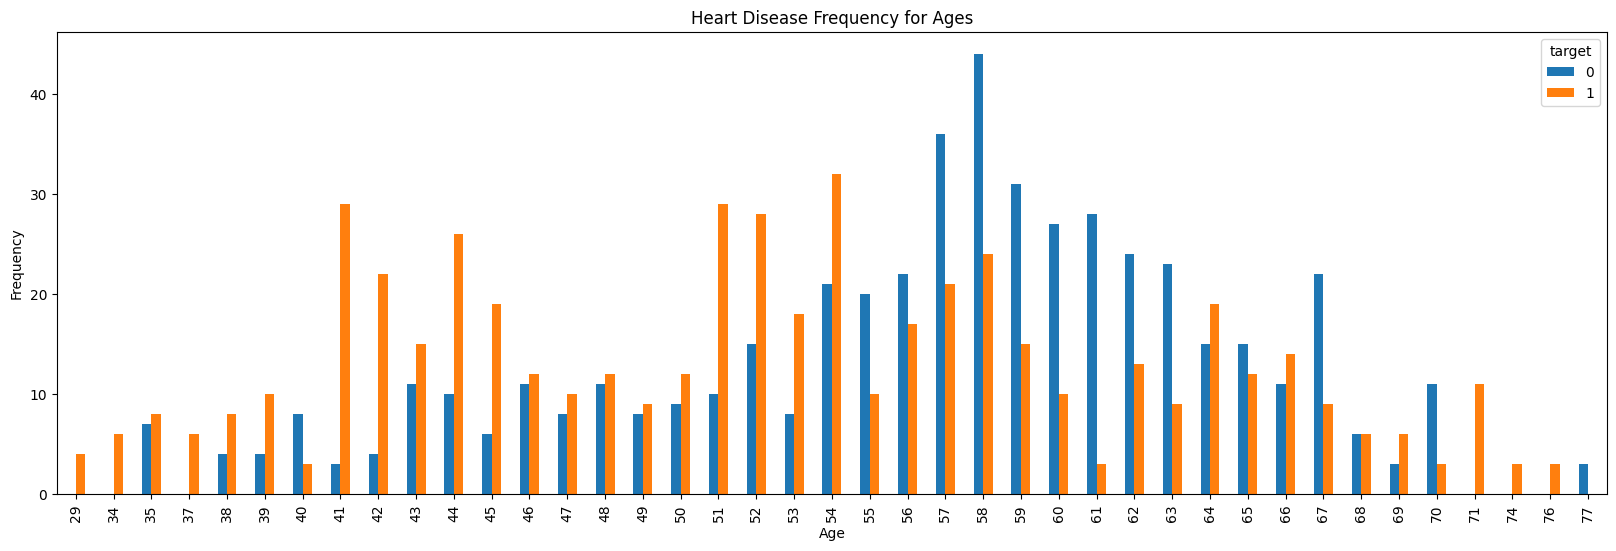

In [ ]:
pd.crosstab(df.age,df.target).plot(kind="bar", figsize=(20, 6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

**6. Разделение данных на признаки и цели**

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**7. Масштабирование данных**

In [ ]:
from sklearn.preprocessing import StandardScaler



scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**8. Построение множественной модели: логистическая регрессия, опорная векторная машина (SVM), наивный байесовский алгоритм, дерево решений и knn, сравнение всех обученных моделей, построение их матриц путаницы и выполнение  кросс-валидацию**

Confusion Matrix for Logistic Regression:
[[73 29]
 [13 90]]


Confusion Matrix for SVM:
[[85 17]
 [ 6 97]]


Confusion Matrix for KNN:
[[79 23]
 [11 92]]


Confusion Matrix for Naive Bayes:
[[72 30]
 [11 92]]


Confusion Matrix for Decision Tree:
[[102   0]
 [  3 100]]


                     Accuracy  Precision    Recall  F1 Score
Logistic Regression  0.795122   0.756303  0.873786  0.810811
SVM                  0.887805   0.850877  0.941748  0.894009
KNN                  0.834146   0.800000  0.893204  0.844037
Naive Bayes          0.800000   0.754098  0.893204  0.817778
Decision Tree        0.985366   1.000000  0.970874  0.985222






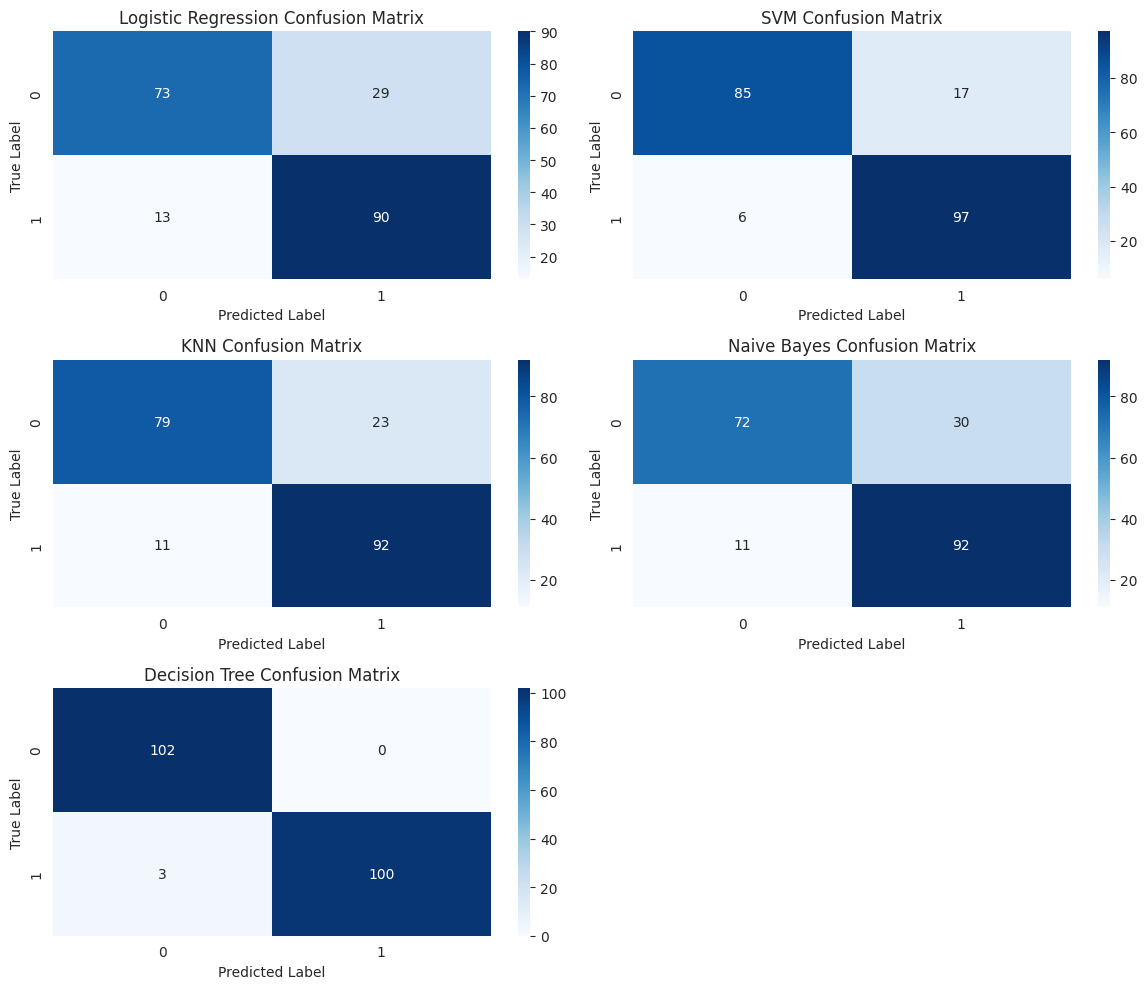

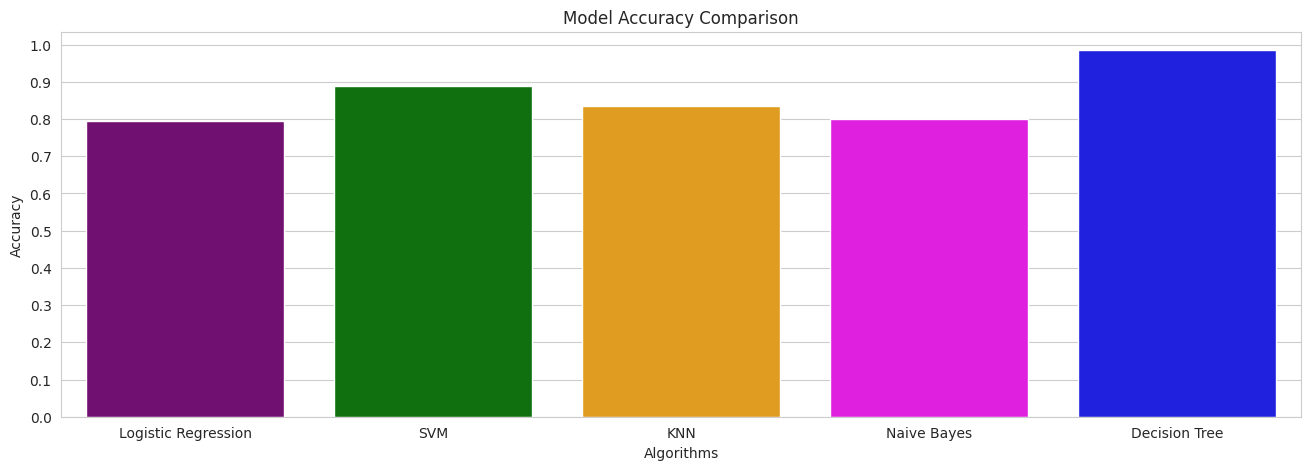

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Define models to evaluate
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier()
}

# Dictionaries to store evaluation metrics and confusion matrices
results = {}
confusion_matrices = {}

# Evaluate each model
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Collect evaluation metrics
    results[model_name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    }

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices[model_name] = cm

    # Print confusion matrix
    print(f"Confusion Matrix for {model_name}:")
    print(cm)
    print("\n")

# Display the results as a DataFrame
results_df = pd.DataFrame(results).T
print(results_df)
print("\n")
print("\n")

# Extract accuracy scores for each model for plotting
accuracies = {model_name: metrics["Accuracy"] for model_name, metrics in results.items()}

# Visualize the confusion matrices in their own figure with spacing
plt.figure(figsize=(12, 10))
for i, (model_name, cm) in enumerate(confusion_matrices.items(), 1):
    plt.subplot(3, 2, i)  # Adjust subplot dimensions if you have more than 5 models
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
plt.tight_layout()  # Ensures that subplots are spaced properly
plt.show()

print("\n")
print("\n")

# Create a new figure for the accuracy bar plot
plt.figure(figsize=(16, 5))
colors = ["purple", "green", "orange", "magenta", "blue"]
sns.set_style("whitegrid")
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylabel("Accuracy")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.title("Model Accuracy Comparison")
plt.show()


**9. Реализуйте другой метод классификации и добавьте его в сравнение (SVC)**

Confusion Matrix for Logistic Regression:
[[73 29]
 [13 90]]


Confusion Matrix for SVM:
[[85 17]
 [ 6 97]]


Confusion Matrix for KNN:
[[79 23]
 [11 92]]


Confusion Matrix for Naive Bayes:
[[72 30]
 [11 92]]


Confusion Matrix for Decision Tree:
[[102   0]
 [  3 100]]


Confusion Matrix for SVC_Manual:
[[102   0]
 [103   0]]


                     Accuracy  Precision    Recall  F1 Score
Logistic Regression  0.795122   0.756303  0.873786  0.810811
SVM                  0.887805   0.850877  0.941748  0.894009
KNN                  0.834146   0.800000  0.893204  0.844037
Naive Bayes          0.800000   0.754098  0.893204  0.817778
Decision Tree        0.985366   1.000000  0.970874  0.985222
SVC_Manual           0.497561   0.000000  0.000000  0.000000






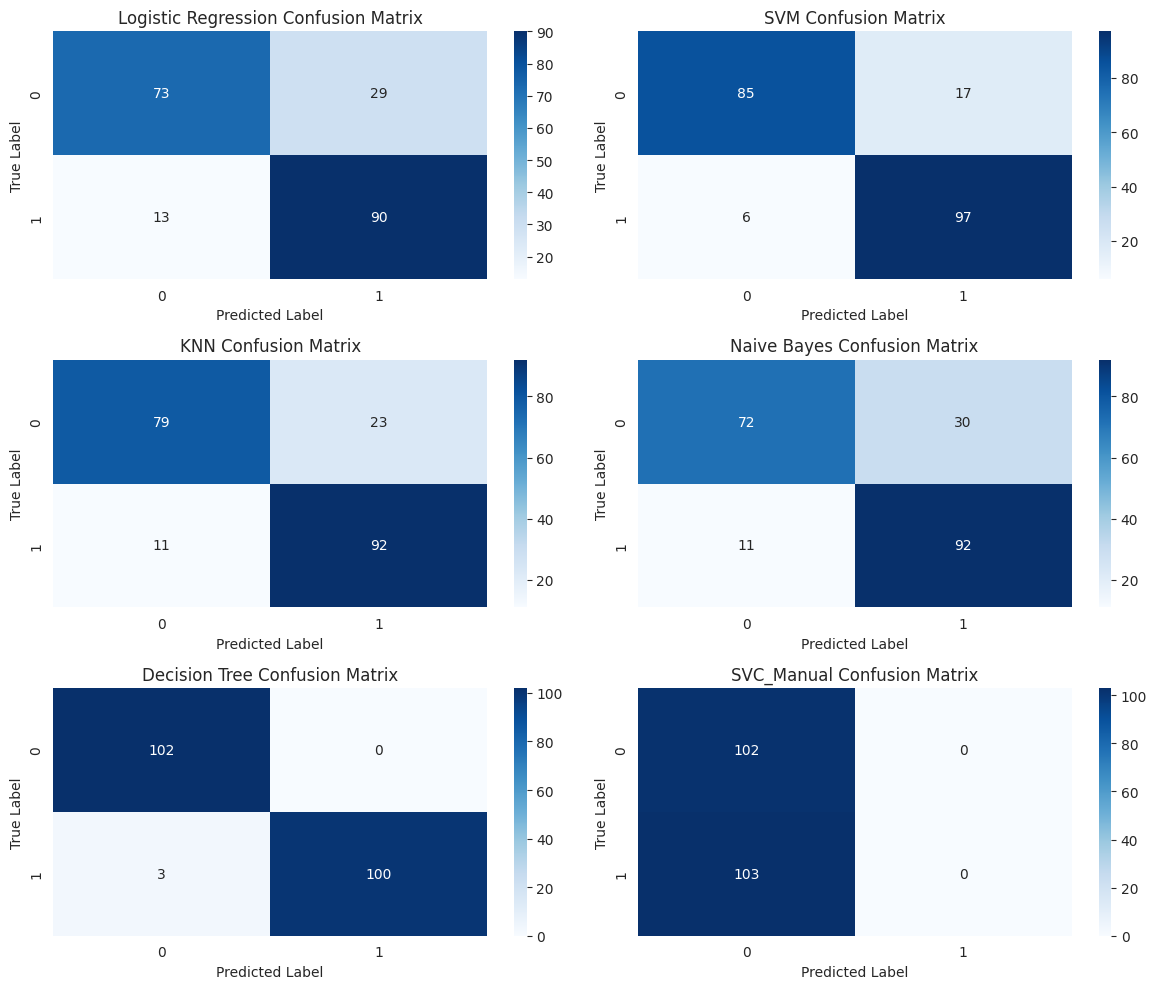

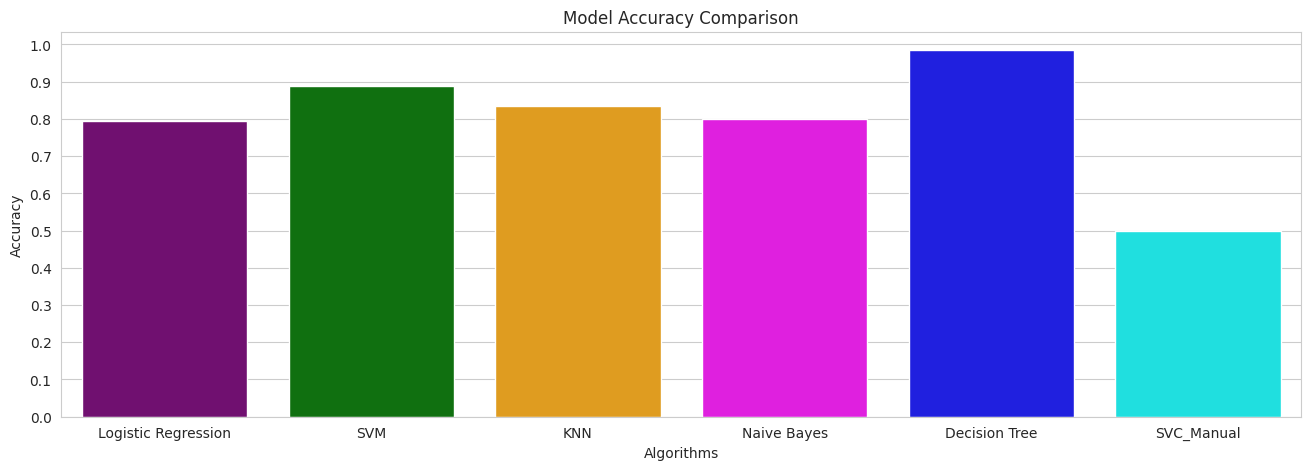

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# Define your custom SVC_Manual class
class SVC_Manual:
    def __init__(self, learning_rate=0.001, regularization_param=0.01, max_iters=1000):
        self.learning_rate = learning_rate
        self.regularization_param = regularization_param
        self.max_iters = max_iters

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0
        for _ in range(self.max_iters):
            for i in range(n_samples):
                condition = y[i] * (np.dot(X[i], self.w) + self.b) >= 1
                if condition:
                    self.w -= self.learning_rate * (2 * self.regularization_param * self.w)
                else:
                    self.w -= self.learning_rate * (2 * self.regularization_param * self.w - np.dot(X[i], y[i]))
                    self.b -= self.learning_rate * y[i]

    def predict(self, X):
        return np.sign(np.dot(X, self.w) + self.b)

# Split your data into features (X) and target (y)
X = df.drop('target', axis=1)  # Features
y = df['target']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert y_train labels to -1 and 1 for SVC_Manual
y_train_svc = y_train.replace({0: -1, 1: 1}).values

# Define the models
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVC_Manual": SVC_Manual(learning_rate=0.01, regularization_param=0.01, max_iters=10000)
}

# Dictionary to store evaluation metrics and confusion matrices
results = {}
confusion_matrices = {}

# Evaluate each model
for model_name, model in models.items():
    # Train the model differently if it's SVC_Manual
    if model_name == "SVC_Manual":
        model.fit(X_train_scaled, y_train_svc)
        y_pred = model.predict(X_test_scaled)
        # Convert predictions back to 0 and 1 for evaluation
        y_pred = np.where(y_pred == -1, 0, 1)
    else:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

    # Collect evaluation metrics
    results[model_name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    }

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices[model_name] = cm

    # Print confusion matrix
    print(f"Confusion Matrix for {model_name}:")
    print(cm)
    print("\n")

# Display the results as a DataFrame
results_df = pd.DataFrame(results).T
print(results_df)

print("\n")
print("\n")


# Extract accuracy scores for the bar plot
accuracies = {model_name: metrics["Accuracy"] for model_name, metrics in results.items()}

# Plot confusion matrices
plt.figure(figsize=(12, 10))
for i, (model_name, cm) in enumerate(confusion_matrices.items(), 1):
    plt.subplot(3, 2, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")

plt.tight_layout()
plt.show()

print("\n")
print("\n")

# Plot accuracy bar plot
colors = ["purple", "green", "orange", "magenta", "blue", "cyan"]
sns.set_style("whitegrid")
plt.figure(figsize=(16, 5))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylabel("Accuracy")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.title("Model Accuracy Comparison")
plt.show()


**Заключение:**

По результатам, Decision Tree является лучшей моделью с точки зрения точности, достоверности, полноты и оценки F1. Она стабильно работает лучше других моделей по всем показателям.

Как выбрать лучшую модель:
Если точность является вашей основной метрикой: выберите Decision Tree (0.985366).
Если важнее баланс между точностью и полнотой (и минимизация как ложных положительных, так и ложных отрицательных результатов): Decision Tree по-прежнему является лучшей, но SVM также является сильным претендентом с хорошей точностью и полнотой.